In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

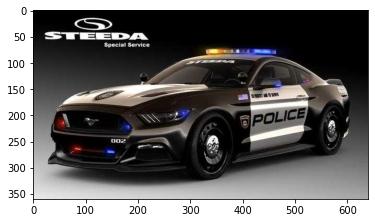

In [2]:
Data_dir = "C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train"

categories = ["Police", "Normal"]
 
for category in categories:
    path = os.path.join(Data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    break
    

In [3]:
training_data = []
img_size = 224

def create_train_data():
    for category in categories:
        path = os.path.join(Data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                
                img_array_gray = cv2.cvtColor(img_array_rgb, cv2.COLOR_RGB2GRAY)
                
                new_array = cv2.resize(img_array_gray, (img_size, img_size))
                
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_train_data()

In [4]:
import random

random.shuffle(training_data)

In [5]:
len(training_data)

1899

In [6]:
X = []
y = []

In [7]:
for features, label in training_data:
    resized_image = cv2.resize(features, (img_size, img_size))
    X.append(resized_image)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

In [8]:
X.shape

(1899, 224, 224, 1)

In [9]:
X_resized = []
for image in X:
    resized_image = cv2.resize(image, (224, 224))
    X_resized.append(resized_image)

X = np.array(X_resized).reshape(-1, img_size, img_size, 1)

In [10]:
X.shape

(1899, 224, 224, 1)

In [11]:
y.shape

(1899,)

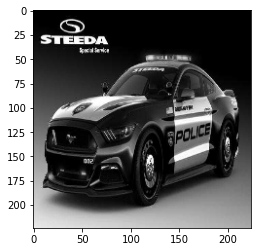

In [12]:
plt.imshow(X[1], cmap="gray")

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [14]:
X1=[]
for i in X:
    i=i/255.0
    X1.append(i)
    
X1 = np.array(X1)

In [15]:


model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(
            loss="binary_crossentropy",
            optimizer=Adam(learning_rate=0.0001),
            metrics=["accuracy"])


In [16]:
#model.fit(X, y, batch_size = 32, validation_split=0.1, epochs=10)

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [18]:
import time

start_time = time.time()

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=10)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time} seconds")

Train set: (1519, 224, 224, 1) (1519,)
Validation set: (190, 224, 224, 1) (190,)
Test set: (190, 224, 224, 1) (190,)
Epoch 1/10
48/48 [==============================] - 69s 1s/step - loss: 0.6816 - accuracy: 0.6024 - val_loss: 0.6291 - val_accuracy: 0.6789
Epoch 2/10
48/48 [==============================] - 69s 1s/step - loss: 0.6752 - accuracy: 0.6024 - val_loss: 0.6647 - val_accuracy: 0.6789
Epoch 3/10
48/48 [==============================] - 67s 1s/step - loss: 0.6754 - accuracy: 0.6024 - val_loss: 0.6448 - val_accuracy: 0.6789
Epoch 4/10
48/48 [==============================] - 70s 1s/step - loss: 0.6758 - accuracy: 0.6024 - val_loss: 0.6441 - val_accuracy: 0.6789
Epoch 5/10
48/48 [==============================] - 69s 1s/step - loss: 0.6734 - accuracy: 0.6024 - val_loss: 0.6381 - val_accuracy: 0.6789
Epoch 6/10
48/48 [==============================] - 70s 1s/step - loss: 0.6740 - accuracy: 0.6024 - val_loss: 0.6423 - val_accuracy: 0.6789
Epoch 7/10
48/48 [=========================

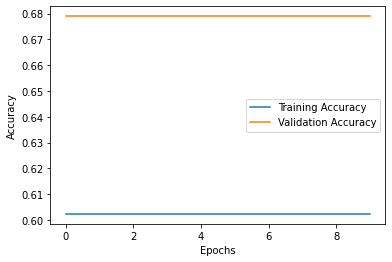

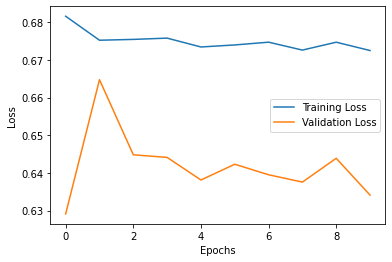

6/6 [==============================] - 2s 356ms/step - loss: 0.6689 - accuracy: 0.6105
Test Accuracy: 61.05%


In [19]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


In [20]:
model.save('police_car_detection_gray.h5')

C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
def prepare(filepath):
    img_size = 224
    
    # Read the image from the file path
    img_array = cv2.imread(filepath)
    
    # Convert the image to RGB format
    img_array_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    
    # Convert the RGB image to grayscale
    img_array_gray = cv2.cvtColor(img_array_rgb, cv2.COLOR_RGB2GRAY)
    
    # Resize the grayscale image to the specified size (224x224)
    new_array = cv2.resize(img_array_gray, (img_size, img_size))
    
    # Add batch dimension and channel dimension
    new_array = np.expand_dims(new_array, axis=(0, -1))
    
    return new_array


In [22]:
model = tf.keras.models.load_model('police_car_detection_gray.h5')

In [23]:
prediction = model.predict([prepare("test.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 100ms/step
Normal


In [24]:
prediction = model.predict([prepare("test1.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 31ms/step
Normal


In [25]:
prediction = model.predict([prepare("test2.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 30ms/step
Normal


In [26]:
prediction = model.predict([prepare("test3.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 31ms/step
Normal


In [27]:
prediction = model.predict([prepare("test4.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 30ms/step
Normal


In [28]:
prediction = model.predict([prepare("test5.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 33ms/step
Normal
